### 大样本的意义

当我们增加样本容量时，即使是最小的差异看起来也可能变得非常显著。 

为了说明这一点，请完成这个 notebook 和下面的测试题目。

首先，导入库和数据。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

`1.` 在这个案例中，假设我们想要测试 `full_data` 中所有个体的平均身高是否等于67.60英寸或 **不等于** 67.60 英寸。  首先，通过下面的 **测试 1** 来确定这些案例的零假设和备择假设。

`2.` 人口平均身高是多？人口身高的标准差是多少？使用下面的代码创建一组样本数据。样本的平均身高是多少？模拟五个值的平均值的抽样分布，查看其形状并绘制一个直方图。这五次抽样的平均值的抽样分布的标准差是多少？回答下面的 **测试 2** ，确保你的答案是正确的。

In [3]:
full_data.height.mean()

67.597486973079342

In [4]:
full_data.height.std()

3.1194332065503421

In [5]:
sample1 = full_data.sample(5)
sample1.height.mean()

67.882342520490838

In [6]:
sample1.height.std()

2.8434965552901939

In [7]:
sample2 = full_data.sample(1000)
sample2.height.mean()

67.551531609117291

In [8]:
sample2.height.std()

3.0462940846360556

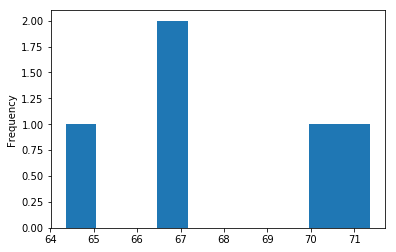

In [9]:
sample1.height.plot.hist();

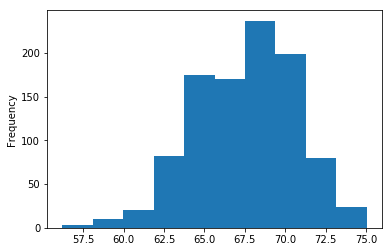

In [10]:
sample2.height.plot.hist();

0    67.597754
dtype: float64
0    0.081114
dtype: float64


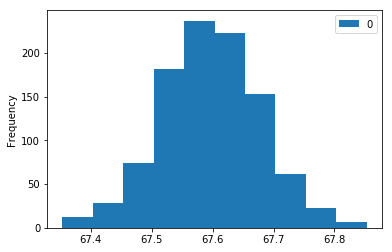

In [11]:
# 根据前面的自助法，这里我们模拟1000遍抽取，每次抽取5个样本
# 将每次5个样本的平均身高存到一个列表
# 转换为df求平均值、标准差并且画图

# 设定空列表
mean_list = []

# 循环1000次得到有1000次随机抽取5样本的平均值
for i in range(1000):
    sample_height = full_data.height.sample(1000)
    mean_list.append(sample_height.mean())

# 转换为 dataframe
mean_df = pd.DataFrame(mean_list)

# 求平均值
print(mean_df.mean())

# 求标准差
print(mean_df.std())

# 画图
mean_df.plot.hist();

`3.` 使用问题1中的零假设和备择假设以及问题2中抽样分布的结果，模拟你在零假设中的期望平均值。使用这些模拟值来确定一个p值，做出一个关于零假设和备择假设的决定。通过下面的 **测试 3** 和 **测试 4** 来检查你的解决方案。

**提示:**  [这里](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) 的 Numpy 文件可以帮你完成你的解决方案。

In [17]:
# 使用置信区间方法计算p值

## 首先，我们有了零假设时候的平均身高
null_mean = full_data.height.mean()
##也可以按照提交后的提示中直接设定为 67.60
##null_mean = 67.60

# 抽样分布的标准差还要除根号n，n为抽样数
# https://www.jianshu.com/p/110b51bb82b0
std_sampling_dist = full_data.height.std()/np.sqrt(5)

## 设定模拟数据的次数
num_sims = 10000

## 将零假设的平均身高、标准差、模拟数据的次数作为3个输入
## 用 random.normal() 进行正太分布模拟
null_sims = np.random.normal(null_mean, std_sampling_dist, num_sims)

## 计算区间的下边界，为实际值减去差值
low_ext = (null_mean - (sample1.height.mean() - null_mean))

## 同理上边界，为实际值加上差值，下面结果是原始式子的简化
## null_mean + (sample1.height.mean - null_mean) = sample1.height.mean
high_ext = sample1.height.mean()

## 最后计算 p 值
## 是通过 零假设 的身高，和上下两个边界做比较
## null_sims > high_ext 是说的比高值还大
print((null_sims>high_ext).mean())
print((null_sims<low_ext).mean())
## null_sims < low_ext 是说的比低值还小
## 最后，把这两个概率加一起，就得到了答案（即不在高值和低值区间中的概率）
(null_sims > high_ext).mean() + (null_sims < low_ext).mean()
# 解释
## 因为零假设是 = ，所以在做P值判断的时候是双边的
## 结果两边的面积分别占 0.412，说明两边的尾巴特别大
## 此时 P 值为两尾之和 0.836，说明无法拒绝零假设
## 本节的另一个作用是当抽样数量变多时，会非常确定 p 值接近1
## 具体计算见下个代码框，也有个别模拟时出现大于1的情况（毕竟是模拟）

0.4173
0.4187


0.83600000000000008

`4.` 现在，假设你从上面问题2中的样本中得到了相同的样本均值，但是样本数量是1000。对于这1000个值的平均值，你的抽样分布的新标准差是多少？此外，你的新p值是在你设定的零假设和备择假设之间选择的吗？模拟五个值的平均值的抽样分布，查看其形状并绘制一个直方图。在这里根据你的解决方案来回答下面的第二个到最后一个测试题目。

**提示：**  需要注意的是，如果遇到任何困难，你可以使用测试中的解决方案，尽早找到 p 值，只需稍作更改即可获得该答案。

`5.` 通过回答最后一个测试题目，回顾本节内容。

In [36]:
# 使用置信区间方法计算p值（1000个样本）
# sample
sample2 = full_data.sample(1000)
sample2.height.mean()


null_mean = 67.60

# 这是从理论层面上计算抽样分布标准差的另一种方法
## 5 换成 1000
std_sampling_dist = sample2.height.std()/np.sqrt(1000)
std_sampling_dist = sample2.height.std()
## 下面是设定模拟数据的次数
num_sims = 10000

## 将零假设的平均身高、标准差、模拟数据的次数作为3个输入
## 用 random.normal() 进行正太分布模拟
null_sims = np.random.normal(null_mean, std_sampling_dist, num_sims)

## 这里计算区间的下边界，为实际值减去差值
low_ext = (null_mean - (sample2.height.mean() - null_mean))

## 同理上边界，为实际值加上差值（因为样本值大，所以下面简化直接用的样本平均身高）
high_ext = sample2.height.mean()

## 最后计算 p 值
## 是通过 零假设 的身高，和上下两个边界做比较
## null_sims > high_ext 是说的比高值还大
## null_sims < low_ext 是说的比低值还小
print((null_sims>high_ext).mean())
print((null_sims<low_ext).mean())
## 最后，把这两个概率加一起，就得到了答案（即不在高值和低值区间中的概率）
(null_sims > high_ext).mean() + (null_sims < low_ext).mean()

0.5071
0.4954


1.0024999999999999